<a href="https://www.kaggle.com/code/mehrajalomtapadar/customer-churn-prediction-using-ann?scriptVersionId=248974396" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
#Please Upvote if you're having or taking idea from my notebook 
# You have a great learning Ahead 

In [3]:
#Importing Basic libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
# All the basic information about the dataset 
def Basic_info(df):
    print("shape of the dataset")
    print(df.shape)
    print("random 10 samples")
    print(df.sample(10))
    print("Description")
    print(df.describe())
    print("Info")
    print(df.info())
    print("Any NULL Value Exist?")
    print(df.isnull().sum())
Basic_info(df)

shape of the dataset
(7043, 21)
random 10 samples
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6304  2754-XBHTB  Female              0      No         No       9   
6259  2661-GKBTK    Male              0     Yes        Yes      60   
4136  3079-BCHLN    Male              0     Yes         No      47   
4727  3154-HMWUU    Male              0     Yes         No      60   
985   9369-XFEHK  Female              1     Yes         No      33   
3745  2645-QTLMB    Male              0      No         No       7   
5550  8746-BFOAJ    Male              1      No         No      21   
4857  6344-SFJVH  Female              0      No         No      20   
5786  8661-BOYNW  Female              0     Yes         No      72   
3969  2920-RNCEZ    Male              0     Yes        Yes       1   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
6304          Yes                No     Fiber optic                   No  ...   
6259          Yes

In [6]:
#As we dont have any null values we can go for further analysis 
#but in info : This row
                      #19  TotalCharges      7043 non-null   object 
#is in object dtypes --> so we have to convert it to float 


print(df["TotalCharges"].dtypes)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")
print(df["TotalCharges"])

object
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [7]:
df.shape

(7043, 21)

In [8]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5746,4817-QRJSX,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),81.00,818.05,Yes
2430,1821-BUCWY,Male,0,No,No,30,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Mailed check,55.65,1653.85,No
6998,0928-XUTSN,Female,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.50,1011.80,No
1546,7114-AEOZE,Female,0,No,No,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1128.10,No
4952,7379-FNIUJ,Male,0,No,No,2,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.50,No
1592,8387-MOJJT,Female,0,Yes,Yes,42,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),77.95,3384.00,Yes
2849,6838-HVLXG,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,246.70,No
4354,1955-IBMMB,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.20,1192.30,No
5043,4325-NFSKC,Male,1,No,No,19,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.60,1660.00,Yes
1330,0661-WCQNQ,Male,0,Yes,No,22,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),56.25,1292.20,No


In [9]:
#Customer ID has no contribution to the churn so better to relase it 
df = df.drop("customerID",axis="columns")
df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6081,Male,0,No,No,1,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.8,49.8,No
5783,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.3,89.3,Yes


In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
for col in df.columns:
    print(df[col].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

In [12]:
# Look At this 
#InternetService
# Fiber optic    3096
# DSL            2421
# No             1526

# we can replace DSL & Fibre optics as they tend to yes for internet connection 
df["InternetService"] = df["InternetService"].replace({
    "Fiber optic" : "Yes",
    "DSL" : "No"
})
df["InternetService"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
#Similerly we have replace **No IneternetService with No**

to_replace = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for col in to_replace:
     df[col] = df[col].replace({
       "No internet service" : "No"  
     })

In [14]:
for col in to_replace:
    print(df[col].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [15]:
df["MultipleLines"] = df["MultipleLines"].replace({
    "No phone service" : "No"
})

In [16]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [17]:
df["PaymentMethod"] = df["PaymentMethod"].apply(
    lambda x: "Online" if isinstance(x, str) and x.endswith("(automatic)") else "Offline"
)

In [18]:
df["Contract"] = df["Contract"].apply(lambda x : "Monthly" if isinstance(x,str) and x.startswith("Month") else "Yearly")

In [19]:
df.head(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,No,No,Yes,No,No,No,No,Monthly,Yes,Offline,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,No,Yes,No,Yes,No,No,No,Yearly,No,Offline,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,No,Yes,Yes,No,No,No,No,Monthly,Yes,Offline,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,No,Yes,No,Yes,Yes,No,No,Yearly,No,Online,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Monthly,Yes,Offline,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Monthly,Yes,Offline,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Monthly,Yes,Online,89.10,1949.40,No
7,Female,0,No,No,10,No,No,No,Yes,No,No,No,No,No,Monthly,No,Offline,29.75,301.90,No


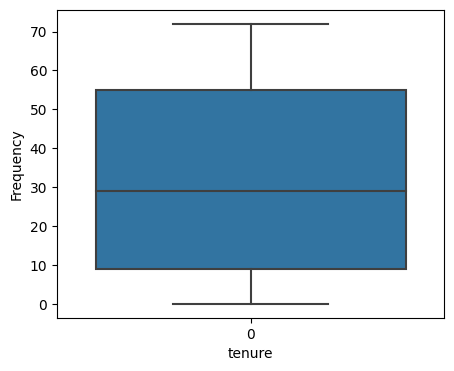

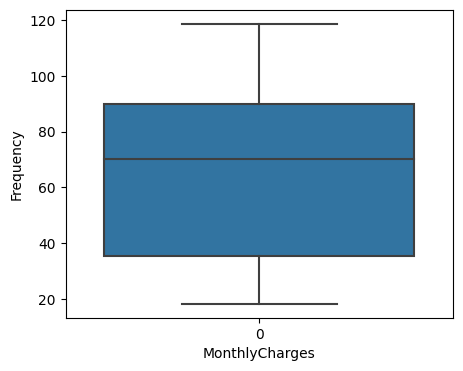

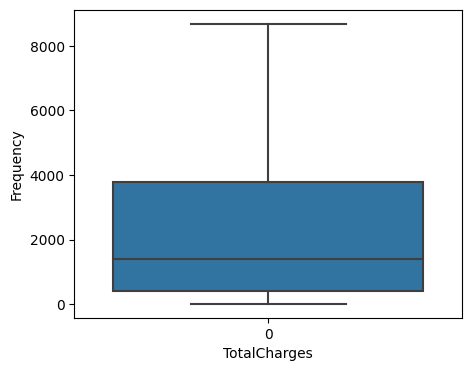

In [20]:
def visualize(df,col):
    for co in col:
        plt.figure(figsize=(5,4))
        sns.boxplot(df[co])
        plt.xlabel(co)
        plt.ylabel("Frequency")
        plt.show()
col = ["tenure","MonthlyCharges","TotalCharges"]
visualize(df,col)

In [21]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5558,Female,0,Yes,Yes,72,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yearly,Yes,Online,116.40,8543.25,No
3983,Male,0,No,No,1,No,No,No,No,No,No,No,No,No,Monthly,Yes,Offline,24.25,24.25,Yes
2896,Male,0,No,No,13,Yes,No,No,No,No,No,No,No,No,Yearly,Yes,Offline,19.95,253.80,No


In [22]:
#Lets convert "Yes" & "No" with 1 & 0 
yes_no_cols = ["Partner", "Dependents", "PhoneService", "MultipleLines","InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
               "PaperlessBilling", "Churn"]

df[yes_no_cols] = df[yes_no_cols].replace({"Yes": 1, "No": 0})
df.drop(["Contract"],axis = "columns", inplace=True)
df.head(3)

df["PaymentMethod"] = df["PaymentMethod"].apply(lambda x : 0 if x == "Offline" else 1)
df["gender"] = df["gender"].apply(lambda x : 0 if x == "Female" else 1)

/tmp/ipykernel_35/3213938571.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_cols] = df[yes_no_cols].replace({"Yes": 1, "No": 0})


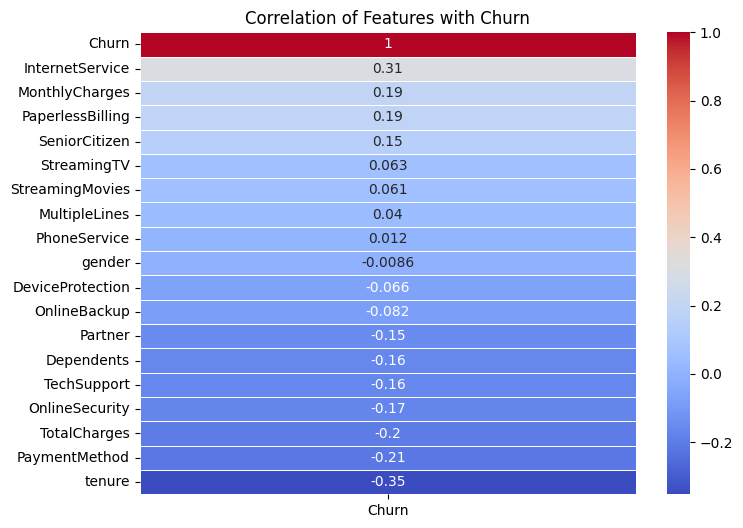

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Churn'] = df['Churn'].astype(int)
correlation = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)



plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Churn')
plt.show()


In [24]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,1,0,53.85,108.15,1


In [25]:
df.dtypes 

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [26]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df = df.dropna(subset=['tenure', 'MonthlyCharges', 'TotalCharges'])
scaler = MinMaxScaler()

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [27]:
from sklearn.model_selection import train_test_split
x = df.drop("Churn",axis="columns")
y = df["Churn"]
X_train,X_test,y_train,y_test = train_test_split(
    x,y,test_size = 0.25,random_state = 42,stratify = y
)

In [28]:

!pip install -q tensorboard pyngrok

# ✅ Imports
import tensorflow as tf
from tensorflow import keras
import datetime
import os
import threading
from tensorboard import program
from pyngrok import ngrok

ngrok.set_auth_token("2zSXaLt0QjnYUy9IP3hTZCkXAuz_2c7HZxvaLvaNzywJaqcWB")

model = keras.Sequential([
    keras.layers.Dense(18, input_shape=(18,), activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#  TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1
)
model.fit(
    X_train,
    y_train,
    epochs=200,
    callbacks=[tensorboard_callback],
    validation_split=0.2  # Optional
)

def run_tensorboard():
    tb = program.TensorBoard()
    tb.configure(argv=[None, "--logdir", log_dir, "--port", "7007"])
    tb.launch()

thread = threading.Thread(target=run_tensorboard)
thread.start()


public_url = ngrok.connect(7007)
print(f"\n🌐 Open TensorBoard in browser: {public_url}")


2025-07-05 17:14:48.836740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751735689.052099      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751735689.111842      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/200                                                                                         


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-05 17:15:04.692759: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6741 - loss: 0.6096 - val_accuracy: 0.7573 - val_loss: 0.4956
Epoch 2/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.4692 - val_accuracy: 0.7915 - val_loss: 0.4406
Epoch 3/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8055 - loss: 0.4266 - val_accuracy: 0.7991 - val_loss: 0.4339
Epoch 4/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7994 - loss: 0.4301 - val_accuracy: 0.7886 - val_loss: 0.4417
Epoch 5/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.4331 - val_accuracy: 0.7991 - val_loss: 0.4300
Epoch 6/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8054 - loss: 0.4208 - val_accuracy: 0.8009 - val_loss: 0.4299
Epoch 7/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4306 - val_accuracy: 0.7991 - val_loss: 0.4296
Epoch 8/200
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.4292 - val_accuracy: 0.7972

In [29]:
model.evaluate(X_test, y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.5010


[0.48076727986335754, 0.7878270745277405]

In [30]:
yp = model.predict(X_test)
yp[:5]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


[2025-07-05T17:16:41Z INFO  rustboard_core::cli] Wrote port "40469" to /tmp/tensorboard_data_server_cwfgaf0_/port
[2025-07-05T17:16:41Z INFO  rustboard_core::cli] Starting load cycle
[2025-07-05T17:16:41Z INFO  rustboard_core::cli] Finished load cycle (9.828482ms)


array([[4.9987704e-01],
       [3.4075615e-04],
       [4.6725163e-01],
       [4.1194835e-01],
       [2.4493125e-01]], dtype=float32)

In [31]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [32]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [33]:
y_test.head(10)

945     1
504     0
4856    1
4150    0
5884    1
5960    0
2509    0
1883    1
3467    1
437     0
Name: Churn, dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1291
           1       0.63      0.49      0.55       467

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



Text(95.72222222222221, 0.5, 'Truth')

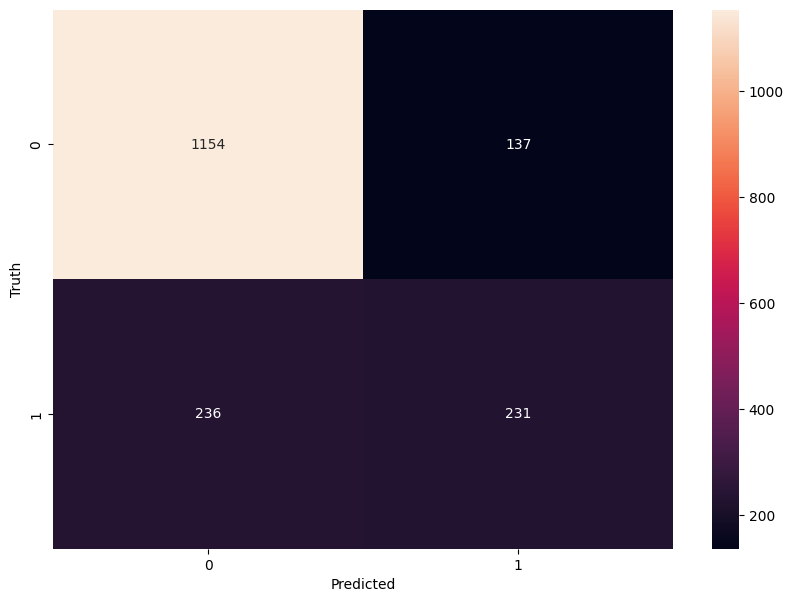

In [35]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

####  Class-wise Performance:

##### Class 0 – No Churn
- **Precision** = 0.84 → When the model says "No Churn", it's correct 84% of the time.
- **Recall** = 0.87 → It correctly identifies 87% of non-churn customers.
- **F1-Score** = 0.86 → Overall performance for this class is strong.

##### Class 1 – Churn
- **Precision** = 0.60 → When the model says "Churn", it's correct only 60% of the time.
- **Recall** = 0.54 → It only catches 54% of the actual churners.
- **F1-Score** = 0.57 → Model struggles with identifying churned customers.

In [36]:
#Saving the model 

model.save('churn_model.h5')  

#To load we can use 
# from tensorflow import keras
# loaded_model = keras.models.load_model('churn_model.h5')
